https://github.com/apple/ml-mkqa

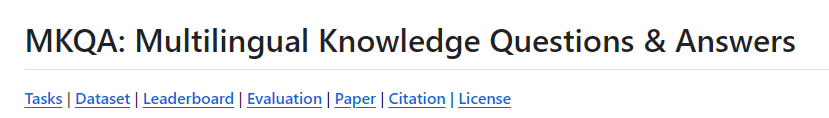

In [ ]:
import gzip
import json

data = []
with gzip.open('mkqa.jsonl.gz', 'rt') as f:  # reading text mode
    for line in f:
        data.append(json.loads(line))

In [ ]:
ko_de_pairs = []
for item in data:
    ko = item['queries']['ko']
    de = item['queries']['de']
    ko_de_pairs.append((ko, de))

In [ ]:
len(ko_de_pairs)

10000

In [ ]:
ko_de_pairs[:10]

[('쌍둥이 빌딩이 지어지기 까지 얼마나 걸려',
  'Wie lange dauerte es, um die Twin Towers zu bauen?'),
 ('어디에서 용어 great scott가 나왔나요', 'Woher kommt der Satz great scott'),
 ("누가 love you like there's no tomorrow",
  "Wer singt love you like there's no tomorrow"),
 ('스크림 퀸스', "Wie viele Staffeln von 'Scream Queens' gibt es?"),
 ('언제 레이커스가 마지막으로 플레이오프에 진출했나요',
  'wann haben es die lakers das leztze mal in die playoffs geschafft'),
 ('기묘한 이야기 한 시즌에 몇 개의',
  'wie viele Folgen in einer Staffel von fremden Dingen'),
 ("i hear you knocking but you can't come in는 누가 불렀나요",
  "wer singt  i hear you knocking but you can't come in"),
 ('보이스에 누가 나왔나', 'Wer zeigte als erster die Show "The Voice"?'),
 ('언제 서부 개척 시대가 시작하고 끝', 'Wann begann und endete der Wilde Westen'),
 ('스타벅스 로고는 어디에서 나왔나요', 'Wo stammte das Logo von Starbucks her?')]

In [ ]:
test = []
for item in data:
    ko = item['answers']['ko'][0]['text']
    de = item['answers']['de'][0]['text']
    test.append((ko, de))

In [ ]:
test[:10]

[('11.0 연도', '11.0 Jahr'),
 (None, None),
 ('크리스 영', 'Chris Young'),
 ('2.0', '2.0'),
 ('2013', '2013'),
 ('3.0', '3.0'),
 ('데이브 에드먼드', 'Dave Edmunds'),
 ('존 더몰', 'John de Mol'),
 ('1865', '1865'),
 (None, None)]

답변은 쓸데 없다.

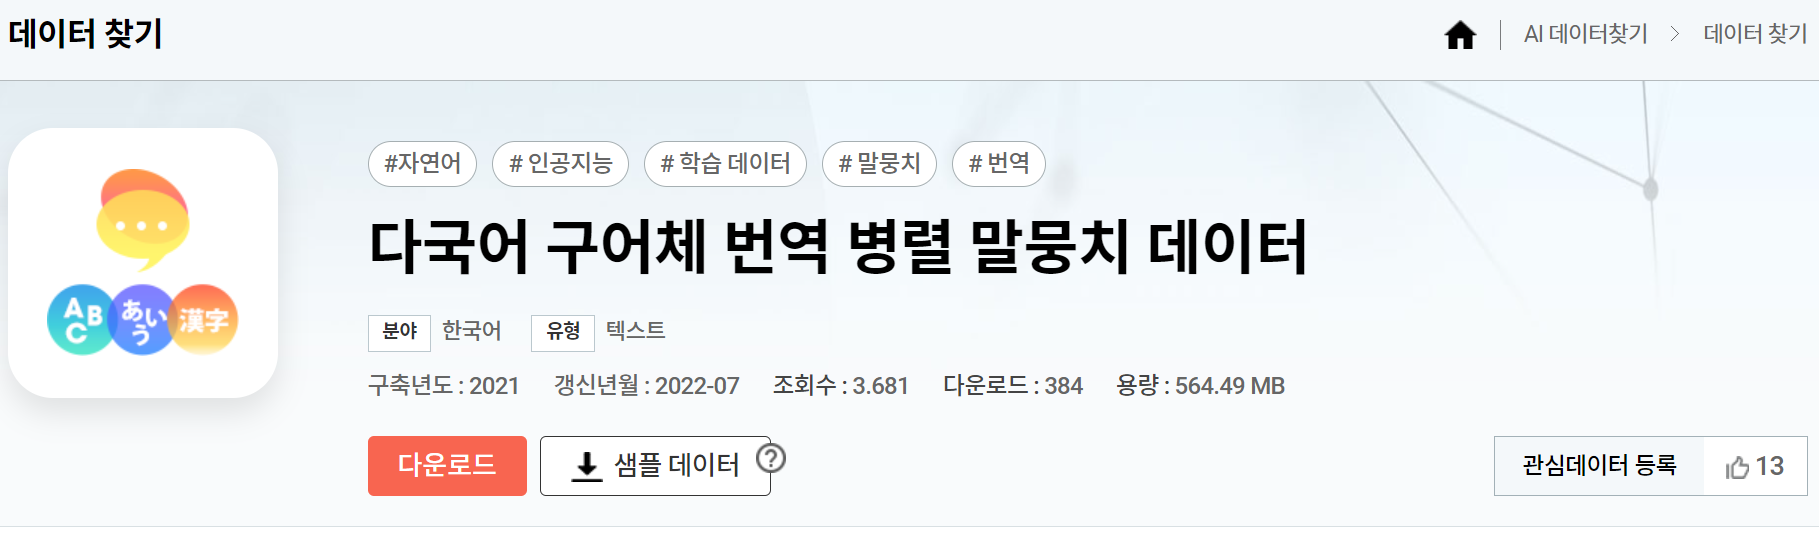

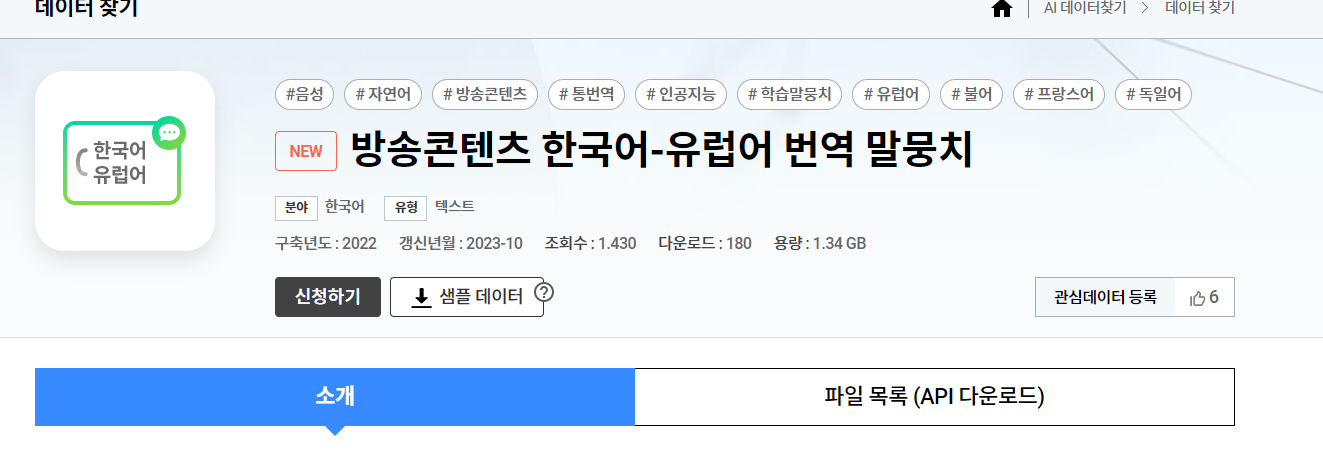

In [ ]:
with open('/content/데이터28_독한_일상생활_TTA품질검증_250000_sample.json', 'r') as f:
    data = json.load(f)
ko_de_pair19 = [(item['최종번역문'], item['원문']) for item in data]

with open('/content/데이터28_독한_해외영업_TTA품질검증_250000_sample.json', 'r') as f:
    data = json.load(f)
ko_de_pair20 = [(item['최종번역문'], item['원문']) for item in data]

with open('/content/데이터28_한독_해외영업_TTA품질검증_250000_sample.json', 'r') as f:
    data = json.load(f)
ko_de_pair21 = [(item['원문'], item['최종번역문']) for item in data]

with open('/content/데이터28_한독_일상생활_TTA품질검증_250000_sample.json', 'r') as f:
    data = json.load(f)
ko_de_pair22 = [(item['원문'], item['최종번역문']) for item in data]

In [ ]:
ko_de_pair19[0]

('결혼 후에, 어떤 보상도 시장을 통해 이뤄지지 않는다.',
 'Nach der Eheschließung erfolgt keine Entlohnung über den Markt.')

In [ ]:
TTAdata = ko_de_pair22 + ko_de_pair21 + ko_de_pair20 + ko_de_pair19
len(TTAdata)

400

In [ ]:
knd = (TTAdata + ko_de_pairs)
len(knd)

10400

In [ ]:
with open('/content/dc_k_000001_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair1 = [(data['원문'], data['최종번역문'])]

with open('/content/dc_k_000002_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair2 = [(data['원문'], data['최종번역문'])]

with open('/content/dc_k_000003_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair3 = [(data['원문'], data['최종번역문'])]
ko_de_pair3[0]

with open('/content/et_c_108493_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair4 = [(data['원문'], data['최종번역문'])]
ko_de_pair4[0]

with open('/content/et_c_108494_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair5 = [(data['원문'], data['최종번역문'])]
ko_de_pair5[0]
with open('/content/et_c_108495_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair6 = [(data['원문'], data['최종번역문'])]
ko_de_pair6[0]

with open('/content/iv_c_213906_kode.json', 'r') as f:
    data = json.load(f)

ko_de_pair7 = [(data['원문'], data['최종번역문'])]
ko_de_pair7[0]

# 이하 생략..

("'굳이 죄 없는 아이들을 대상으로 지뢰 작업을 시켜야 했나?' 이런 생각이 들거든요.",
 "Ich denke so, 'Mussten wir wirklich an unschuldigen Kindern die Minen bearbeiten?'")

In [ ]:
# for i in range(34):
#   ko_de_pairs.append(f'ko_de_pair{i}')

In [ ]:
len(knd)

10400

In [ ]:
total_pairs = []

for i in range(1, 32):
    total_pairs.extend(globals()[f'ko_de_pair{i}'])

In [ ]:
len(total_pairs)

427

In [ ]:
finalData = knd + total_pairs

In [ ]:
len(finalData)

10827

In [ ]:
df.to_json('finalDataaa.json', orient='records', lines=True)

# 번역기 만들기 시작

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
pip install transformers

In [ ]:
pip install datasets

In [ ]:
pip install evaluate

In [ ]:
pip install sacrebleu

# 1. 데이터 불러오기

In [ ]:
import json
data = []
with open('finalDataaa.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
data[0]

{'ko': '그렇게하자~ 나도 구경해보고 싶어.',
 'de': 'Machen wir das ~ Ich möchte auch einen Blick darauf werfen.'}

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns=['ko', 'de'])

In [ ]:
df.head()

,ko,de
0,그렇게하자~ 나도 구경해보고 싶어.,Machen wir das ~ Ich möchte auch einen Blick d...
1,해변을 보고 나서 저녁 먹을 식당도 미리 알아보자!,"Nachdem wir den Strand gesehen haben, suchen w..."
2,둘러봐야지 뭘살지 알지~,"Du musst dich umschauen, so dass du weißt was ..."
3,그러면 내가 오늘 저녁 살게.,Dann werde ich dich heute zum Abendessen einla...
4,혹시 이 제품 중 오늘 들어온 도시락은 어떤걸까요?,"Was ist mit der Lunchbox, die heute hereinkam?"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10827 entries, 0 to 10826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ko      10827 non-null  object
 1   de      10827 non-null  object
dtypes: object(2)
memory usage: 169.3+ KB


In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [ ]:
# 데이터셋을 'train'과 'test'로 분할
dataset = dataset.train_test_split(test_size=0.2)

train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['ko', 'de'],
        num_rows: 8661
    })
    test: Dataset({
        features: ['ko', 'de'],
        num_rows: 2166
    })
})

In [ ]:
train_dataset[0]

{'ko': '고대 문학에 우루크에 팔라딘은 누구  였나요',
 'de': 'Wer war Paladin in Uruk in der antiken Literatur'}

In [ ]:
test_dataset[0]

{'ko': "aerosmith의 don't want to miss a thing의 의미",
 'de': "Bedeutung von Aerosmith don't want to miss a thing"}

In [ ]:
from transformers import MarianMTModel, MarianTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer

# 2. 전처리

In [ ]:
model_name = 'Helsinki-NLP/opus-mt-ko-de'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage d

In [ ]:
def preprocess_function(examples):
    inputs = [ex for ex in examples['ko']]
    targets = [ex for ex in examples['de']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/8661 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/2166 [00:00<?, ? examples/s]

In [ ]:
pip install transformers[torch]

In [ ]:
# training_args = Seq2SeqTrainingArguments(
#     output_dir="my-Helsinki-NLP/opus-mt-ko-de",
#     evaluation_strategy = "epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     save_total_limit=3,
#     predict_with_generate=True,
# )

# trainer = Seq2SeqTrainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets["train"],
#     eval_dataset=tokenized_datasets["test"],
# )

In [ ]:
# trainer.train()

ValueError: expected sequence of length 10 at dim 1 (got 12)

이 에러는 입력 데이터의 시퀀스 길이가 일정하지 않아 발생합니다. 토크나이저는 각 입력 시퀀스를 독립적으로 처리하므로, 각 시퀀스의 길이는 해당 시퀀스의 원래 길이에 따라 다를 수 있습니다. 따라서 토크나이징 후에 모든 입력 시퀀스의 길이를 동일하게 만들어야 합니다.

이를 해결하기 위해 tokenizer() 함수에 padding='max_length' 인자를 추가할 수 있습니다. 이렇게 하면 모든 시퀀스가 max_length로 지정한 길이와 동일하게 만들어집니다. 이 때 max_length는 원하는 시퀀스의 최대 길이로 설정하면 됩니다:

In [ ]:
def preprocess_function(examples):
    inputs = [ex for ex in examples['ko']]
    targets = [ex for ex in examples['de']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding='max_length')

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True, padding='max_length')

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/8661 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/2166 [00:00<?, ? examples/s]

혹은 동적으로 패딩

In [ ]:
def preprocess_function(examples):
    inputs = [ex for ex in examples['ko']]
    targets = [ex for ex in examples['de']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/8661 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/2166 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
import evaluate

metric = evaluate.load("sacrebleu")

In [ ]:
import numpy as np


def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="my-Helsinki-NLP/opus-mt-ko-de",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
    predict_with_generate=True,
    fp16=True,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,1.874300,2.295398,19.219900,13.277500
2,1.906700,2.263245,19.765500,13.407200
3,1.701200,2.252301,20.193600,13.302900


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 6, 'bad_words_ids': [[62140]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 6, 'bad_words_ids': [[62140]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=1626, training_loss=1.8165349268238775, metrics={'train_runtime': 480.1921, 'train_samples_per_second': 54.11, 'train_steps_per_second': 3.386, 'total_flos': 147490726477824.0, 'train_loss': 1.8165349268238775, 'epoch': 3.0})

In [ ]:
trainer.save_model("my-Helsinki-NLP/opus-mt-ko-de")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 6, 'bad_words_ids': [[62140]], 'forced_eos_token_id': 0}


In [ ]:
from transformers import pipeline

# 번역 파이프라인 생성
translator = pipeline('translation_ko_to_de', model='my-Helsinki-NLP/opus-mt-ko-de')

# 번역할 문장
text = '안녕하세요, 반갑습니다.'

# 번역 수행
translated_text = translator(text)[0]['translation_text']

print(translated_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Wie schön, Sie zu sehen.


In [ ]:
translator("오늘 공부가 너무 하기 싫네요. 언제 쉴 수 있을까요")

[{'translation_text': 'Ich möchte heute nicht arbeiten. Wann kann ich mich freinehmen?'}]

In [ ]:
with open('채식주의자_1.txt', 'r', encoding='utf-8') as f:
    korean_data = f.readlines()

In [ ]:
translated_data = [translator(text)[0]['translation_text'] for text in korean_data]

In [ ]:
for ko, de in zip(korean_data[:10], translated_data[:10]):
    print(f'한국어: {ko.strip()}')
    print(f'독일어: {de}')
    print()

한국어: 아내가 채식을 시작하기 전까지 나는 그녀가 특별한 사람이라고 생각한 적이 없었다.
독일어: Ich hatte noch nie gedacht, dass sie eine spezielle Person war, bevor meine Frau angefangen hatte zu essen.

한국어: 솔직히 말하자면, 아내를 처음 만났을 때 끌리지도 않았다.
독일어: Ich muss sagen, als ich meine Frau zum ersten Mal traf, fühlte ich mich nicht zu ihr hingezogen.

한국어: 크지도 작지도 않은 키, 길지도 짧지도 않은 단발머리, 각질이 일어난 노르스름한 피부, 외꺼풀 눈에 약간 튀어나온 광대뼈, 개성있어 보이는 것을 두려워하는 듯한 무채색의 옷차림.
독일어: Größe nicht größer oder kleiner, nicht lang oder kurz, die gelbe Haut, die sich entwickelt hat, ein bisschen Schwemmknochen in den Augen der Fittiche, ein formloses kleid, das aussieht, als würde man sich fürchten, personell zu sein.

한국어: 가장 단순한 디자인의 검은 구두를 신고 그녀는 내가 기다리는 테이블로 다가왔다.
독일어: Sie trug die einfachsten Design-Schuhe und kam auf den Tisch, auf den ich gewartet hatte.

한국어: 빠르지도, 느리지도, 힘있지도, 가냘프지도 않은 걸음걸이로.
독일어: schnell, langsam, stark, aber nicht wackelig.

한국어: 내가 그녀와 결혼한 것은, 그녀에게 특별한 매력이 없는 것과 같이 특별한 단점도 없어 보였기 때문이었다.
독일어: Ich habe mit ihr geheiratet, weil ich dacht